In [2]:
import pandas as pd

## Load Dataset

In [4]:
# train data load
train = pd.read_csv("train.csv", index_col = "PassengerId")

# 出力確認
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# test data load
test = pd.read_csv("test.csv", index_col = "PassengerId")

# 出力確認
print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
import seaborn as sns

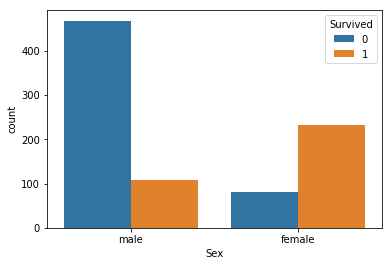

In [7]:
# 性別で生存を確認
sns.countplot(data=train, x="Sex", hue="Survived")

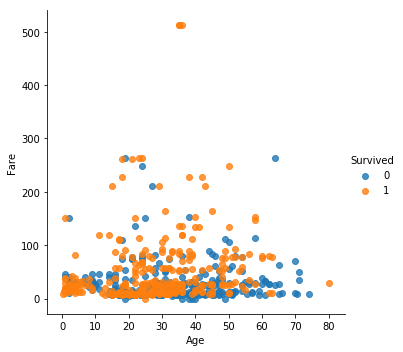

In [22]:
#　年齢と料金の関係を確認
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [26]:
#200料金以上の生存は少ないため、　100以下のデータで行う
low_fare = train[train["Fare"] < 100]
train.shape, low_fare.shape

((891, 11), (838, 11))

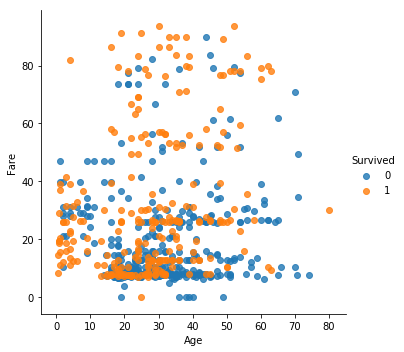

In [27]:
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

## データ予測作業

In [31]:
#性別予測モデル作成
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

print(train.shape)

# defaultで5行まで表示
train[["Sex", "Sex_encode"]].head()

(891, 12)


,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [32]:
#同じくtest.csvにも行う
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1

print(test.shape)

test[["Sex", "Sex_encode"]].head()

(418, 11)


,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


In [33]:
#NaNが存在するとMachine Learningする時エラーが出たため、その値を埋める作業を行う
train[train["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,


In [34]:
#testデータも確認
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


In [35]:
#NaNに値を埋めるために、一時的にFare_fillinカラムを作成
train["Fare_fillin"] = train["Fare"]

print(train.shape)
train[["Fare", "Fare_fillin"]].head()

(891, 13)


,Fare,Fare_fillin
PassengerId,,
1,7.2500,7.2500
2,71.2833,71.2833
3,7.9250,7.9250
4,53.1000,53.1000
5,8.0500,8.0500


In [36]:
#同じくtestにも適用
test["Fare_fillin"] = test["Fare"]

print(test.shape)
test[["Fare", "Fare_fillin"]].head()

(418, 12)


,Fare,Fare_fillin
PassengerId,,
892,7.8292,7.8292
893,7.0000,7.0000
894,9.6875,9.6875
895,8.6625,8.6625
896,12.2875,12.2875


In [37]:
# FareがNaNになっている乗客を検索後、0を入れる
test.loc[test["Fare"].isnull(), "Fare_fillin"] = 0

# 0が入っているか確認
test.loc[test["Fare"].isnull(), ["Fare", "Fare_fillin"]]

,Fare,Fare_fillin
PassengerId,,
1044,NaN,0.0


In [54]:
#Age　２０歳以下を学生とする
train["Student"] = train["Age"] < 20
print(train.shape)
train[["Age", "Student"]].head(5)

(891, 14)


,Age,Student
PassengerId,,
1,22.0,False
2,38.0,False
3,26.0,False
4,35.0,False
5,35.0,False


In [39]:
#testに同じ作業
test["Student"] = test["Age"] < 20
print(test.shape)
test[["Age", "Student"]].head(10)

(418, 13)


,Age,Student
PassengerId,,
892,34.5,False
893,47.0,False
894,62.0,False
895,27.0,False
896,22.0,False
897,14.0,True
898,30.0,False
899,26.0,False
900,18.0,True


In [41]:
# Decision Treeに学習してみる
# Label : Target Variableと言われ、正解を求めるカラムを入れるところ（今回の場合 Survivedになる）
# Feature : Labelを得るために、役に立つ値を入れるところ（今回の場合、性別、年齢、料金になる）

label_name = "Survived"
label_name

feature_names = [ "Sex_encode", "Fare_fillin", "Student"]
feature_names

['Sex_encode', 'Fare_fillin', 'Student']

In [42]:
# feature_namesでtrainデータのfeatureを取得
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(891, 3)


,Sex_encode,Fare_fillin,Student
PassengerId,,,
1,0.0,7.2500,False
2,1.0,71.2833,False
3,1.0,7.9250,False
4,1.0,53.1000,False
5,0.0,8.0500,False


In [43]:
#同じくtestにも適用
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(418, 3)


,Sex_encode,Fare_fillin,Student
PassengerId,,,
892,0.0,7.8292,False
893,1.0,7.0000,False
894,0.0,9.6875,False
895,0.0,8.6625,False
896,1.0,12.2875,False


In [44]:
# label_name을でtrainデータのlabelを取得
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [45]:
#Decision Tree

# scikit-learn(sklearn)の tree ModuleからDecisionTreeClassifierを取得
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=8, random_state=0)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [46]:
# DecisionTreeClassifierを学習
# fit という機能でtrainデータのfeature(X_train)とlabel(y_train)を入れる
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [47]:
# fitが終わったら、predictの機能でSurvivedを予測する
#　その後、testデータのSurvivedを返して、predictionsという変数に格納
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:5]

(418,)


array([0, 1, 0, 0, 1])

In [52]:
# Kaggleが提供している提出向けcsvを読み取る
# PassengerIdは testデータと一緒で, Survivedはmale(0), female(1)が入っている
submission = pd.read_csv("gender_submission.csv", index_col="PassengerId")
print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [53]:
# kaggleに提出するcsv作成
submission.to_csv("submit.csv")